# Open Space on Department of Education Sites

## Data Sources

- MapPLUTO through NYC Digital Twin
- [Building Footprints](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh)
[docs](https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md)
- [Land Cover Raster](https://data.cityofnewyork.us/Environment/Land-Cover-Raster-Data-2017-6in-Resolution/he6d-2qns)
[docs](https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_LandCover.md)


In [1]:
import os
import geopandas as gpd
from dotenv import load_dotenv, find_dotenv

from geoalchemy2 import Geometry, WKTElement
import ipyleaflet
import pandas as pd
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
import sqlalchemy

In [17]:
pd.set_option("display.precision", 8)

In [2]:
# load environment variables from .env file
load_dotenv(find_dotenv())

True

In [3]:
# tmp folder for downloaded data
LOCAL_PATH = os.getenv("LOCAL_PATH")

In [5]:
# db connection
conn_vars = ['REMOTE_TMP_USER', 'REMOTE_TMP_PASSWORD', 'REMOTE_TMP_HOST', 'REMOTE_TMP_PORT', 'REMOTE_TMP_DB']
user, password, host, port, dbname = [os.getenv(var) for var in conn_vars]
conn_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'

In [12]:
engine = sqlalchemy.create_engine(conn_string)

## Fetch Data from PostGIS & Downloaded Files

In [52]:
with open('../queries/2020-07-21_doe-open-space.sql', 'r') as file:
    f = file.read()
    openspace_query = sqlalchemy.text(f)

In [53]:
# get geodataframe from postgis
openspace_gdf = gpd.read_postgis(openspace_query, engine, geom_col='geometry')

In [54]:
openspace_gdf

,geometry,bbl,ownername
0,"POLYGON ((980585.862 200939.528, 980563.536 20...",1000160215.0,NYC DEPARTMENT OF EDUCATION
1,"MULTIPOLYGON (((985184.455 198016.292, 984775....",1001110160.0,NYC DEPARTMENT OF EDUCATION
2,None,1001420001.0,NYC DEPARTMENT OF EDUCATION
3,None,1002360006.0,NYC DEPARTMENT OF EDUCATION
4,"POLYGON ((984805.422 201174.561, 984795.074 20...",1002360038.0,NYC DEPARTMENT OF EDUCATION
...,...,...,...
1095,"POLYGON ((923415.126 136802.876, 923420.950 13...",5070920039.0,NYC DEPARTMENT OF EDUCATION
1096,"POLYGON ((918243.790 136113.764, 918695.519 13...",5073150007.0,NYC DEPARTMENT OF EDUCATION
1097,"POLYGON ((920502.139 124994.901, 920171.105 12...",5077600001.0,NYC DEPARTMENT OF EDUCATION
1098,"POLYGON ((916288.700 124518.554, 916594.881 12...",5078940001.0,NYC DEPARTMENT OF EDUCATION


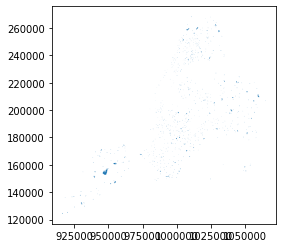

In [55]:
openspace_gdf.plot()

In [56]:
openspace_gdf.to_file("/Users/carstenrodin/Desktop/tmp/openspace3.geojson", driver='GeoJSON')

In [49]:
with open('../queries/2020-07-21_parks.sql', 'r') as file:
    f = file.read()
    parks_query = sqlalchemy.text(f)

In [50]:
parks_gdf = gpd.read_postgis(parks_query, engine, geom_col='geometry')

In [51]:
parks_gdf.to_file("/Users/carstenrodin/Desktop/tmp/parks.geojson", driver='GeoJSON')